Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
### Complete the Tasks in bold

In [1]:
from scipy.io import arff
import pandas as pd

# Load ARFF file with specified encoding
with open('Raisin_Dataset.arff', 'r', encoding='utf-8') as f:
    data, meta = arff.loadarff(f)

# Convert data to pandas DataFrame
df = pd.DataFrame(data)

# Decode byte strings to regular strings if needed
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].str.decode('utf-8')

# Replace categorical values with numerical values
df['Class'] = df['Class'].map({'Kecimen': 0, 'Besni': 1})

# 0 for Kecimen
# 1 for Besni

df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,0
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,0
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,0
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,0
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248.0,430.077308,247.838695,0.817263,85839.0,0.668793,1129.072,1
896,87350.0,440.735698,259.293149,0.808629,90899.0,0.636476,1214.252,1
897,99657.0,431.706981,298.837323,0.721684,106264.0,0.741099,1292.828,1
898,93523.0,476.344094,254.176054,0.845739,97653.0,0.658798,1258.548,1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

**TASK: Create a correlation heatmap.**

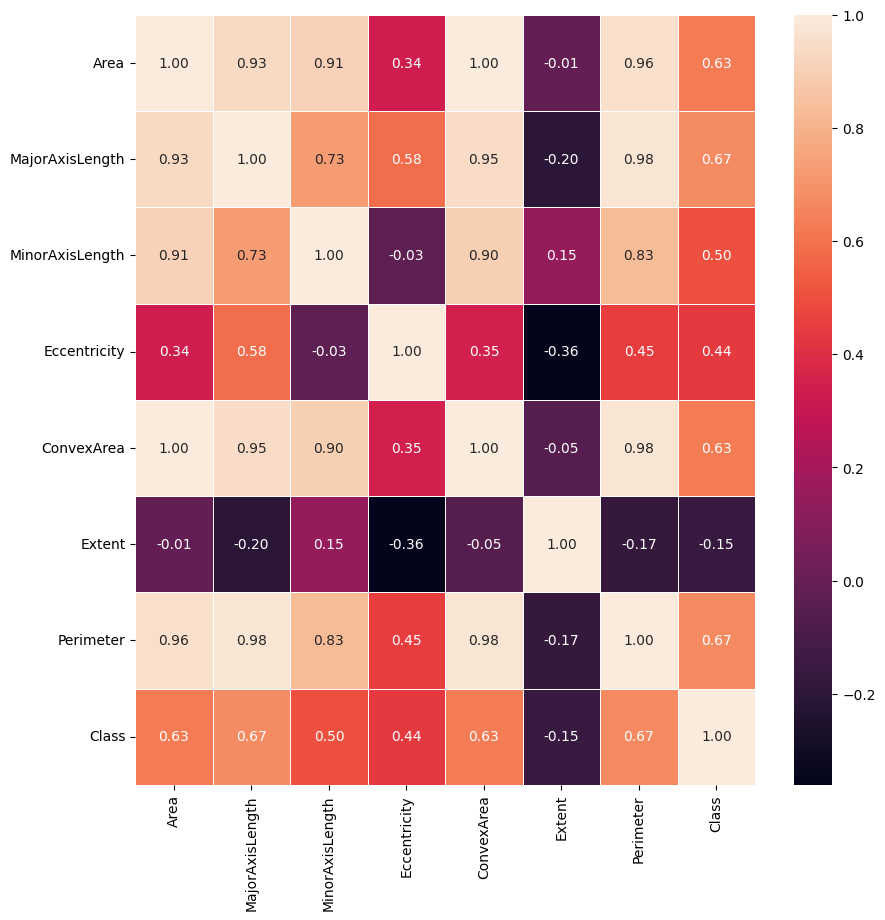

In [3]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.show()

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [4]:
correlation = df.corr().abs()['Class']
top = correlation.drop('Class').nlargest(5)

print("Top 5 Correlated Frequencies:")
top

Top 5 Correlated Frequencies:


MajorAxisLength    0.673194
Perimeter          0.665981
Area               0.625715
ConvexArea         0.625567
MinorAxisLength    0.503102
Name: Class, dtype: float64

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop('Class',axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
knn = KNeighborsClassifier()
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [7]:
operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [8]:
from sklearn.model_selection import GridSearchCV
k_values = list(range(1,20))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [9]:
param_grid = {'knn__n_neighbors': k_values}
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [10]:
full_cv_classifier.best_estimator_.get_params()


{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=7))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=7),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 7,
 'knn__p': 2,
 'knn__weights': 'uniform'}

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

In [11]:
full_cv_classifier.cv_results_['mean_test_score']


array([0.82839506, 0.83333333, 0.84444444, 0.85555556, 0.85925926,
       0.85802469, 0.86419753, 0.86419753, 0.86419753, 0.86419753,
       0.86419753, 0.86419753, 0.86296296, 0.86296296, 0.8617284 ,
       0.8617284 , 0.86296296, 0.8617284 , 0.86296296])

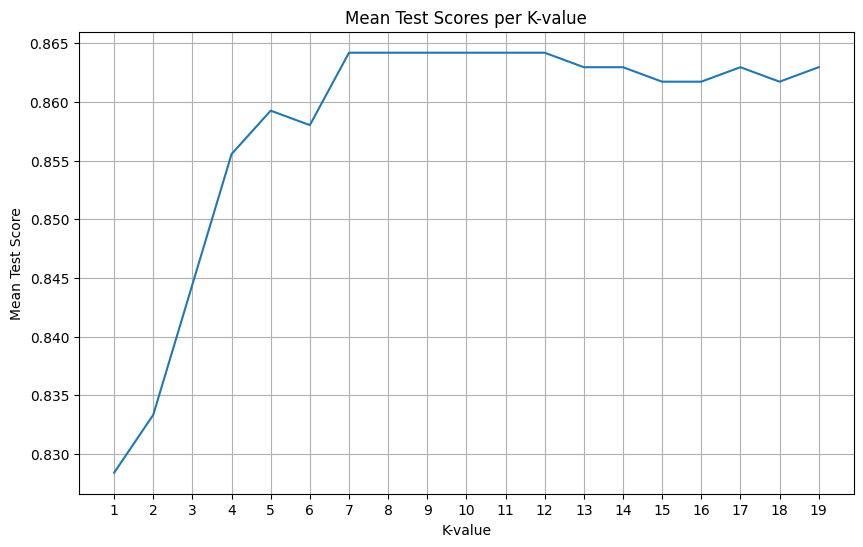

In [12]:
mean_ts = full_cv_classifier.cv_results_['mean_test_score']
k_val = [int(param['knn__n_neighbors']) for param in full_cv_classifier.cv_results_['params']]
plt.figure(figsize=(10, 6))
plt.plot(k_val, mean_ts)
plt.title('Mean Test Scores per K-value')
plt.xlabel('K-value')
plt.ylabel('Mean Test Score')
plt.grid(True)

plt.xticks(range(min(k_val), max(k_val)+1))

plt.show()

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
scaler = StandardScaler()
knn11 = KNeighborsClassifier(n_neighbors=11)
operations = [('scaler',scaler),('knn11',knn11)]

pipe = Pipeline(operations)
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn11', KNeighborsClassifier(n_neighbors=11))])

In [14]:
pipe_pred = pipe.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, pipe_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        48
           1       0.79      0.81      0.80        42

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



In [15]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pipe_pred))

Confusion Matrix:
[[39  9]
 [ 8 34]]
